# DSCI Project Proposal – Group 15

## Introduction

Roughly 17.9 million lives are lost each year due to cardiovascular diseases. Heart activity such as heart rate and resting ECG results can be used to detect cardiovascular diseases. For this project, we want to use the dataset “Heart Failure Prediction Dataset” to answer our question:

***"Does heart activity accurately predict whether a person is at risk of heart disease?"***

This dataset is a combination of independent datasets from hospitals in Hungary, Switzerland, and the United States of America. The dataset in its entirety includes eleven variables that can be used to predict heart disease. However, in our project, we will solely focus on the resting ECG results and the maximum heart rate achieved because we want to know if heart activity alone is an accurate predictor for cardiovascular diseases.

#### *Observations in dataset:*

* Age: age of the patient [years]
* Sex: sex of the patient [M: Male, F: Female]
* ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
* RestingBP: resting blood pressure [mm Hg]
* Cholesterol: serum cholesterol [mm/dl]
* FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
* RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST  elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
* MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
* ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
* Oldpeak: oldpeak = ST [Numeric value measured in depression]
* ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
* HeartDisease: output class [1: heart disease, 0: Normal] 

## Preliminary Exploratory Data Analysis

#### *Reading the data set:*

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)

set.seed(9999)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks read

In [2]:
heart_data <- read_csv("https://raw.githubusercontent.com/tyih985/DSCI-Project-Attempt-2/main/heart.csv")

heart_data

Rows: 918 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): Sex, ChestPainType, RestingECG, ExerciseAngina, ST_Slope
dbl (7): Age, RestingBP, Cholesterol, FastingBS, MaxHR, Oldpeak, HeartDisease

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>
40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1


#### *Cleaning and wrangling the data set:*

In [3]:
heart_data_cleaned <- heart_data |> rename(resting_bp = RestingBP, max_hr = MaxHR, heart_disease = HeartDisease) |>
                                    select(resting_bp, max_hr, heart_disease) |>
                                    mutate(heart_disease = as_factor(heart_disease)) |>
                                    mutate(heart_disease = fct_recode(heart_disease, "yes" = "1", "no" = "0"))

heart_data_cleaned

resting_bp,max_hr,heart_disease
<dbl>,<dbl>,<fct>
140,172,no
160,156,yes
130,98,no
138,108,yes
150,122,no
120,170,no
130,170,no
110,142,no
140,130,yes


#### *Summarizing the data set:*

In the preliminary exploratory analysis we start by reading the data into a dataframe. Because a classification model works best when there are approximately equal amounts of the two groups we wish to classify (heart disease or no heart disease), this is the first table we want to create.

In [6]:
# code
heart_data_cleaned |>
  group_by(heart_disease) |>
  count()

heart_disease,n
<fct>,<int>
no,410
yes,508


As shown in the table, there is almost the same amount of observations with and without heart diseases. Therefore, the data can be used to make a classification model. The next table we want to create, is a table with the mean of the describing variables, grouped by whether or not the observation has a heart disease. 

In [7]:
heart_data_cleaned |>
    group_by(heart_disease) |>
    summarize(mean_resting_bp = mean(resting_bp), mean_max_hr = mean(max_hr))


heart_disease,mean_resting_bp,mean_max_hr
<fct>,<dbl>,<dbl>
no,130.1805,148.1512
yes,134.1850,127.6555


#### *Visualizing the data set:*

In the preliminary exploratory analysis we just want to visualize the relationship between max heart rate and resting bp and color it by if the observation has a heart disease or not. The reason for this, is to investigate if there is any clustering in the observations at all.

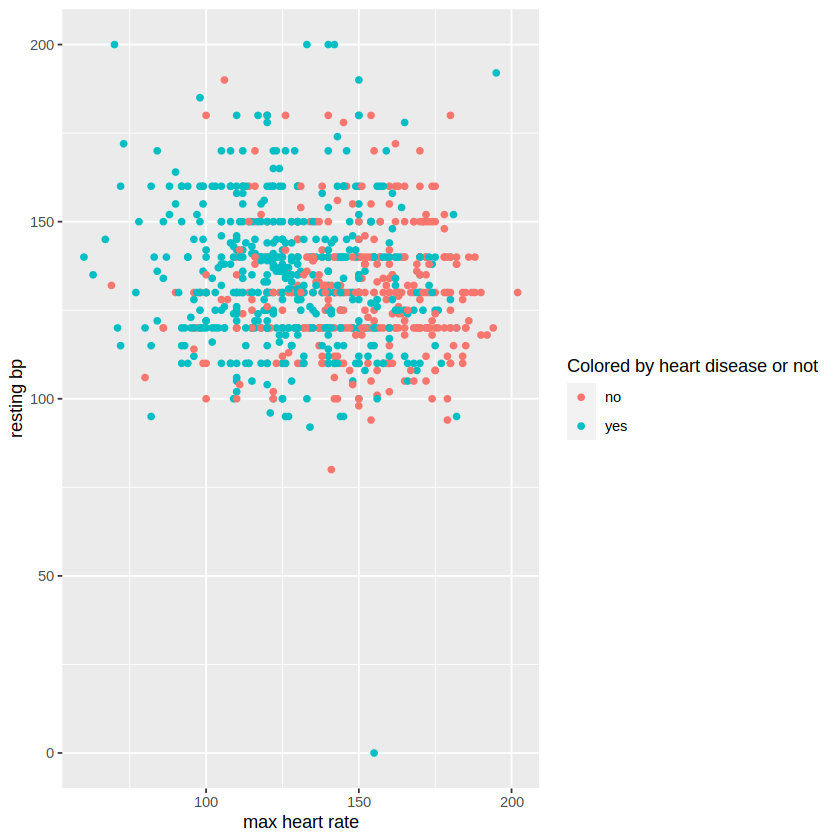

In [8]:
# code
visualization <- ggplot(heart_data_cleaned, aes(x = max_hr, y = resting_bp, color = heart_disease)) + 
    geom_point() + labs(x = "max heart rate", y = "resting bp", color = "Colored by heart disease or not")
visualization

The relationship between max heart rate and resting blood pressure seems to be a positive linear relationship, although it is not very strong. But there is a tendency that if the max heart rate increases, so will the resting blood pressure. From the visualization it looks like it may be possible to make a classification model because there could be some tendency that if you have a higher max heart rate, you are more likely not to have a heart disease. The observations looks like they can be clustered, but we might need more variables if we want to make a more accurate classification model.

## Methods

The values from the selected columns (RestingECG and MaxHR) will be used in our analysis because these observations are directly monitored by heart activity, rather than other observations that are monitored by bodily fluids such as cholesterol. Using these two predictors, we will create a classification model by using K-nearest neighbors algorithm to predict whether a person is at risk of heart disease. To visualize these results, we will use scatter plots and include human readable legends and axes, shapes, and color to distinguish the classes. 

## Expected outcomes and significance:

#### *What do we expect to find?*


#### *What impact could such findings have?*

If we find out that a resting bp has an influence on whether or not a person is likely to get a heart disease, we can advise patients and people in general better in terms of training and diet, and thereby prevent them (or make it less likely) from getting a heart disease.

#### *What future questions could this lead to?*

words